In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from six.moves import cPickle as pickle
from IPython.display import display, Image
import random 
from scipy.misc import imread, imresize
from sklearn.utils import shuffle
from skimage import exposure
import pickle

In [13]:
def pickle_imgs(X, labels, names, class_name, force):
    file_name=class_name+'.pickle'
    if os.path.exists(file_name) and not force:
        print('pickle file %s exists'%(file_name))
    else:
        data={'img':X, 'labels':labels, 'names':names}
        with open(file_name, 'wb') as handle:
            pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print('pickeled %s'%(file_name))
    return 

In [ ]:
root=r"C:/Users/STEVE/Desktop/data/signal images/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images"
class_folders = os.listdir(root)
num_pix=32
num_color=3
for class_folder in class_folders:
    file_name=class_folder+'.pickle'
    if os.path.exists(file_name):
        print('pickle file %s exists'%(file_name))
        continue
    temp_X=np.empty([0,num_pix, num_pix,num_color], dtype=np.float32)
    temp_labels=np.empty([0])
    temp_names=np.empty([0])
    class_path=os.path.join(root,class_folder)
    images=os.listdir(class_path)
    for image in images:
        ftype=image.split(".")[-1]
        if ftype=='ppm': 
            img_path=os.path.join(class_path,image)
            img=imread(img_path)
            newimg=imresize(img, (32,32,3))
            newlabel=int(class_folder)
            temp_X=np.append(temp_X,[newimg], axis=0 )
            temp_labels=np.append(temp_labels,newlabel )
            temp_names=np.append(temp_names,image )
    pickle_imgs(temp_X, temp_labels, temp_names, class_folder, force=False)

pickle file 00000.pickle exists
pickle file 00001.pickle exists
pickle file 00002.pickle exists
pickle file 00003.pickle exists
pickle file 00004.pickle exists
pickle file 00005.pickle exists
pickle file 00006.pickle exists


C:\Users\STEVE\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Users\STEVE\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


pickeled 00007.pickle
pickeled 00008.pickle
pickeled 00009.pickle
pickeled 00010.pickle
pickeled 00011.pickle
pickeled 00012.pickle
pickeled 00013.pickle
pickeled 00014.pickle
pickeled 00015.pickle
pickeled 00016.pickle
pickeled 00017.pickle
pickeled 00018.pickle
pickeled 00019.pickle
pickeled 00020.pickle
pickeled 00021.pickle
pickeled 00022.pickle
pickeled 00023.pickle
pickeled 00024.pickle
pickeled 00025.pickle
pickeled 00026.pickle
pickeled 00027.pickle
pickeled 00028.pickle
pickeled 00029.pickle
pickeled 00030.pickle
pickeled 00031.pickle
pickeled 00032.pickle
pickeled 00033.pickle
pickeled 00034.pickle
pickeled 00035.pickle
pickeled 00036.pickle
pickeled 00037.pickle


In [38]:
def read_pickles(path, num_pix, num_color):
    x=np.empty([0,num_pix, num_pix,num_color], dtype=np.float32)
    l=np.empty([0])
    files = os.listdir(path)
    for file in files:
        file_type=file.split(".")[-1]
        if file_type=='pickle':
            with open(file, 'rb') as handle:
                d = pickle.load(handle)
            x=np.append(x,d['img'], axis=0 )
            l=np.append(l,d['labels'], axis=0 )
    return x, l
            
X,labels=read_pickles(r"C:\Users\STEVE\Neural Network-German Signals", 32, 3)

In [39]:
def get_class_sample(X, labels):
    #n_image=len(np.unique(labels))
    sample_images=np.empty([0,32, 32,3], dtype=np.float32)
    for i in np.unique(labels):
        ind=np.argwhere(labels==i).reshape(-1)[0]
        sample=X[ind,:,:,:]
        sample_images=np.append(sample_images,[sample], axis=0 )
    return sample_images
sample_images=get_class_sample(X, labels)

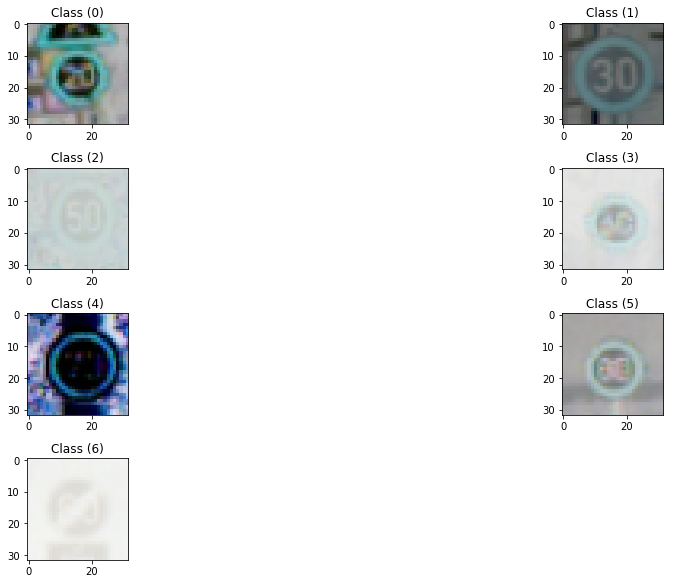

In [40]:
def display_class_samples(class_samples, cols):
    fig = plt.figure(figsize=(15,10))
    n_image=len(class_samples)
    titles = ['Class (%d)' % i for i in range(0,n_image )]
    for n, (sample, title) in enumerate(zip(sample_images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_image/float(cols)), n + 1)
        plt.imshow(sample)
        a.set_title(title)
    plt.tight_layout()
    plt.show()
display_class_samples(sample_images, 5)

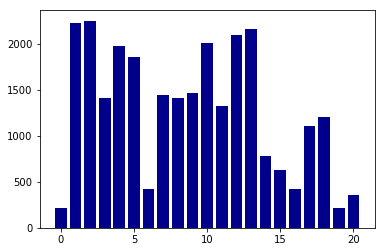

In [18]:
count=[]
for i in np.unique(labels):
    size=np.ravel(np.argwhere(labels==i)).shape[0]
    count.append(size)

fig, ax=plt.subplots(1,1)
ax.bar(np.unique(labels), np.array(count), color='darkBlue')
plt.show()    

In [71]:
def mirror_single_class(M,l, mirror_type):
    if mirror_type=='h':  return M[:, :, ::-1, :], np.repeat(l,M.shape[0])
    elif mirror_type=='v': return M[:, ::-1, :, :], np.repeat(l,M.shape[0])
    elif mirror_type=='hv': return M[:, ::-1, ::-1, :], np.repeat(l,M.shape[0])
    else: 
        Print("inappropriate mirror_type. It has to be either 'h', 'v', or 'hv ")
        return 

h_symmetric = [11, 12, 13, 15, 17, 18, 22, 26, 30, 35]
v_symmetric = [1, 5, 12, 15, 17]
hv_symmetric = [32, 40]
cross_symmetric = [[19, 20], [33, 34], [36, 37], [38, 39] ]

def mirror_multiple_classes(X,labels, class_list, mirror_type):
    X_=np.empty([0,32, 32,3], dtype=np.float32)
    labels_=np.empty([0])
    for i in class_list:
        mirrored, mirror_label=mirror_single_class(X[labels==i],i, mirror_type)
        X_=np.append(X_,mirrored, axis=0)
        labels_=np.append(labels_,mirror_label, axis=0)
    return X_, labels_
hx,hl=mirror_multiple_classes(X,h_symmetric, 'h')
vx,vl=mirror_multiple_classes(X,v_symmetric, 'v')
hvx,hvl=mirror_multiple_classes(X,hv_symmetric, 'hv')
for x,l in zip([hx,vx,hvx], [hl,vl,hvl]):
    X=np.append(X,x,axis=0)
    labels=np.append(labels,l,axis=0)

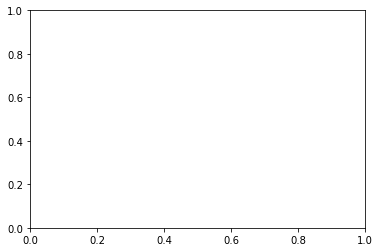

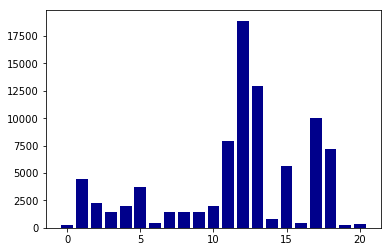

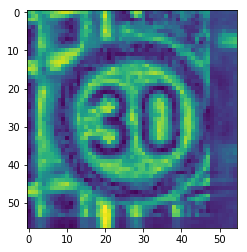

In [7]:
plt.imshow(ss,interpolation='nearest')
plt.show()

19
sample image for 00000_00001.ppm and 19


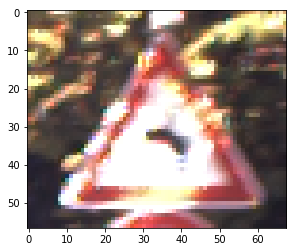

In [14]:
display_category(19)

In [ ]:
self_flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
self_flippable_vertically = np.array([1, 5, 12, 15, 17])
self_flippable_both = np.array([32, 40])
cross_flippable = np.array([
        [19, 20], 
        [33, 34], 
        [36, 37], 
        [38, 39],
        [20, 19], 
        [34, 33], 
        [37, 36], 
        [39, 38],   
    ])
num_classes = 43
